# Lensing from "very close lens" (VCL)

In [1]:
import numpy as np
from scipy.fft import fft, fftfreq, ifft
from pycbc.waveform import get_td_waveform

import sys
sys.path.insert(1, '/Users/paolocremonese/Dropbox/PhD/Python/program_py/packages')
import pyCBC_function as pf

from  astropy.cosmology import FlatLambdaCDM 

#plot
import matplotlib.pyplot as plt
#%matplotlib inline
from matplotlib.ticker import ScalarFormatter
#To activate 
%config InlineBackend.figure_format = 'retina'

fontSz = 15
fontsz = 13
fontssz = 11

#To use LaTex font
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')

In [2]:
# parameters
zS = 0.5
zL = zS - 1e-6
'''
#DS = pf.cosmo.luminosity_distance(zS).value #distance of the source in Mpc
DS, DL = pf.cosmo.luminosity_distance([zS, zL]).value 
DLS = DS - DL

DS1 = pf.D_l(zS, H0=pf.cosmo.H0.value, Om=pf.cosmo.Om0)/pf.pctomt/1e6
DL1 = pf.D_l(zL, H0=pf.cosmo.H0.value, Om=pf.cosmo.Om0)/pf.pctomt/1e6
DLS1 = pf.D_l(zS, zL, H0=pf.cosmo.H0.value, Om=pf.cosmo.Om0)/pf.pctomt/1e3
'''
cosmo1 = FlatLambdaCDM(H0=pf.cosmo.H0.value, Om0=pf.cosmo.Om0, Tcmb0=pf.cosmo.Tcmb0, 
                       Ob0=pf.cosmo.Ob0, Neff=pf.cosmo.Neff)
DS = cosmo1.angular_diameter_distance_z1z2(0, zS).value*(1+zS)**2
DL = cosmo1.angular_diameter_distance_z1z2(0, zL).value*(1+zL)**2
DLS = cosmo1.angular_diameter_distance_z1z2(zL, zS).value*(1+zS)**2

In [3]:
print('Source ld: %f Mpc\nLens ld:   %f Mpc\nDLS ~      %f kpc'%(DS, DL, (DLS)*1e3))
#print('\nSource ld: %f Mpc\nLens ld:   %f Mpc\nDLS ~      %f kpc'%(DS1, DL1, (DLS1)))
#print('\nSource ld: %f Mpc\nLens ld:   %f Mpc\nDLS ~      %f kpc'%(DS2, DL2, (DLS2)*1e3))

Source ld: 2921.022098 Mpc
Lens ld:   2921.015106 Mpc
DLS ~      5.044621 kpc


In [4]:
#help(pf.cosmo.luminosity_distance)
#help(pf.cosmo)
#pf.cosmo

__create waveform__

In [5]:
apx = 'IMRPhenomD'
ms = 50
sample_rate = 2048
hp1, hpx = get_td_waveform(approximant=apx,
                         mass1=ms,
                         mass2=ms,
                         delta_t=1.0/sample_rate,
                         f_lower=25,
                         distance=DS)

#hp2 = hp1 / max(numpy.correlate(hp1, hp1, mode='full'))**0.5

__apply lensing__

In [6]:
htp = fft(hp1.data)#[:len(hp1)//2]
l = len(hp1)
print(l)
fr = fftfreq(len(hp1), hp1.delta_t)#[:len(hp1)//2]

M_l = 100
#zL = 0.2
y = 1
lMSD = 1
amps = np.array([pf.AF_PM(i, M_l, zL, y, lMSD) for i in fr]) #[fr<700]
amps[0] = 0

hp_L_t = htp * np.conj(amps)

hpL = np.real(ifft(hp_L_t))
'''
hpL_f_SIS_fft = np.concatenate((hpL_f_SIS, np.flip(hpL_f_SIS[1:])))
hpL_SIS = np.real(ifft(hpL_f_SIS_fft))
hpL_SIS *= len(hpL_f_SIS)
'''

2048


'\nhpL_f_SIS_fft = np.concatenate((hpL_f_SIS, np.flip(hpL_f_SIS[1:])))\nhpL_SIS = np.real(ifft(hpL_f_SIS_fft))\nhpL_SIS *= len(hpL_f_SIS)\n'

In [7]:
#ER = pf.theta_E(M_l, DLS*pf.pctomt*1e6, DL*pf.pctomt*1e6, DS*pf.pctomt*1e6)
#print(ER)

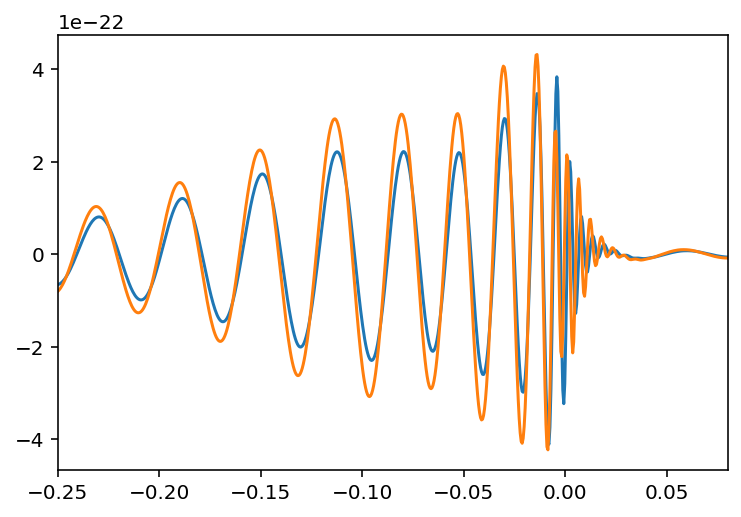

In [8]:
#fine = 1
#inizio = fine-(hp_f.delta_t*len(hpL_SIS))

plt.figure()#figsize=(16,6))
plt.plot(hp1.sample_times, hp1)
plt.plot(hp1.sample_times, hpL)
#plt.plot(np.arange(inizio, fine, hp_f.delta_t),np.roll(hpL_SIS,-150))

plt.xlim(-.25, .08)
#plt.xlim(400, 520)

plt.show()

__phase study__

In [9]:
apx = 'IMRPhenomD'
ms = 50
sample_rate = 2048
hp_f, hx_f = pf.get_fd_waveform(approximant=apx,
                         mass1=ms,
                         mass2=ms,
                         delta_f=1.,
                         f_lower=25,
                         distance=DS)

print(len(hp_f))
#'''
amps_F = np.array([pf.AF_PM(i, M_l, zL, y, lMSD) for i in hp_f.sample_frequencies]) #[fr<700]
amps_F[0] = 0

file_name = '/Users/paolocremonese/Dropbox/PhD/Mathematica/amps_SIS/amps_case_h_H74_y1_M100_zL1e-6_FP'
amps_SIS = np.fromfile(file_name, np.complex64)

hpL_f = hp_f * np.conj(amps_F)
hpL_f_SIS = hp_f * np.conj(amps_SIS)

ps = pf.phase_from_frequencyseries(hp_f)
ps_L = pf.phase_from_frequencyseries(hpL_f)
ps_L_SIS = pf.phase_from_frequencyseries(hpL_f_SIS)
#'''

513


In [10]:
#print(hp_f.sample_frequencies)

/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: divide by zero encountered in true_divide
  return self._data / other
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: divide by zero encountered in true_divide
  return self._data / other
/Users/paolocremonese/opt/anaconda3/envs/igwn-py38/lib/python3.8/site-packages/pycbc/types/array.py:368: RuntimeWarning: invalid value encountered in true_divide
  return self._data / other


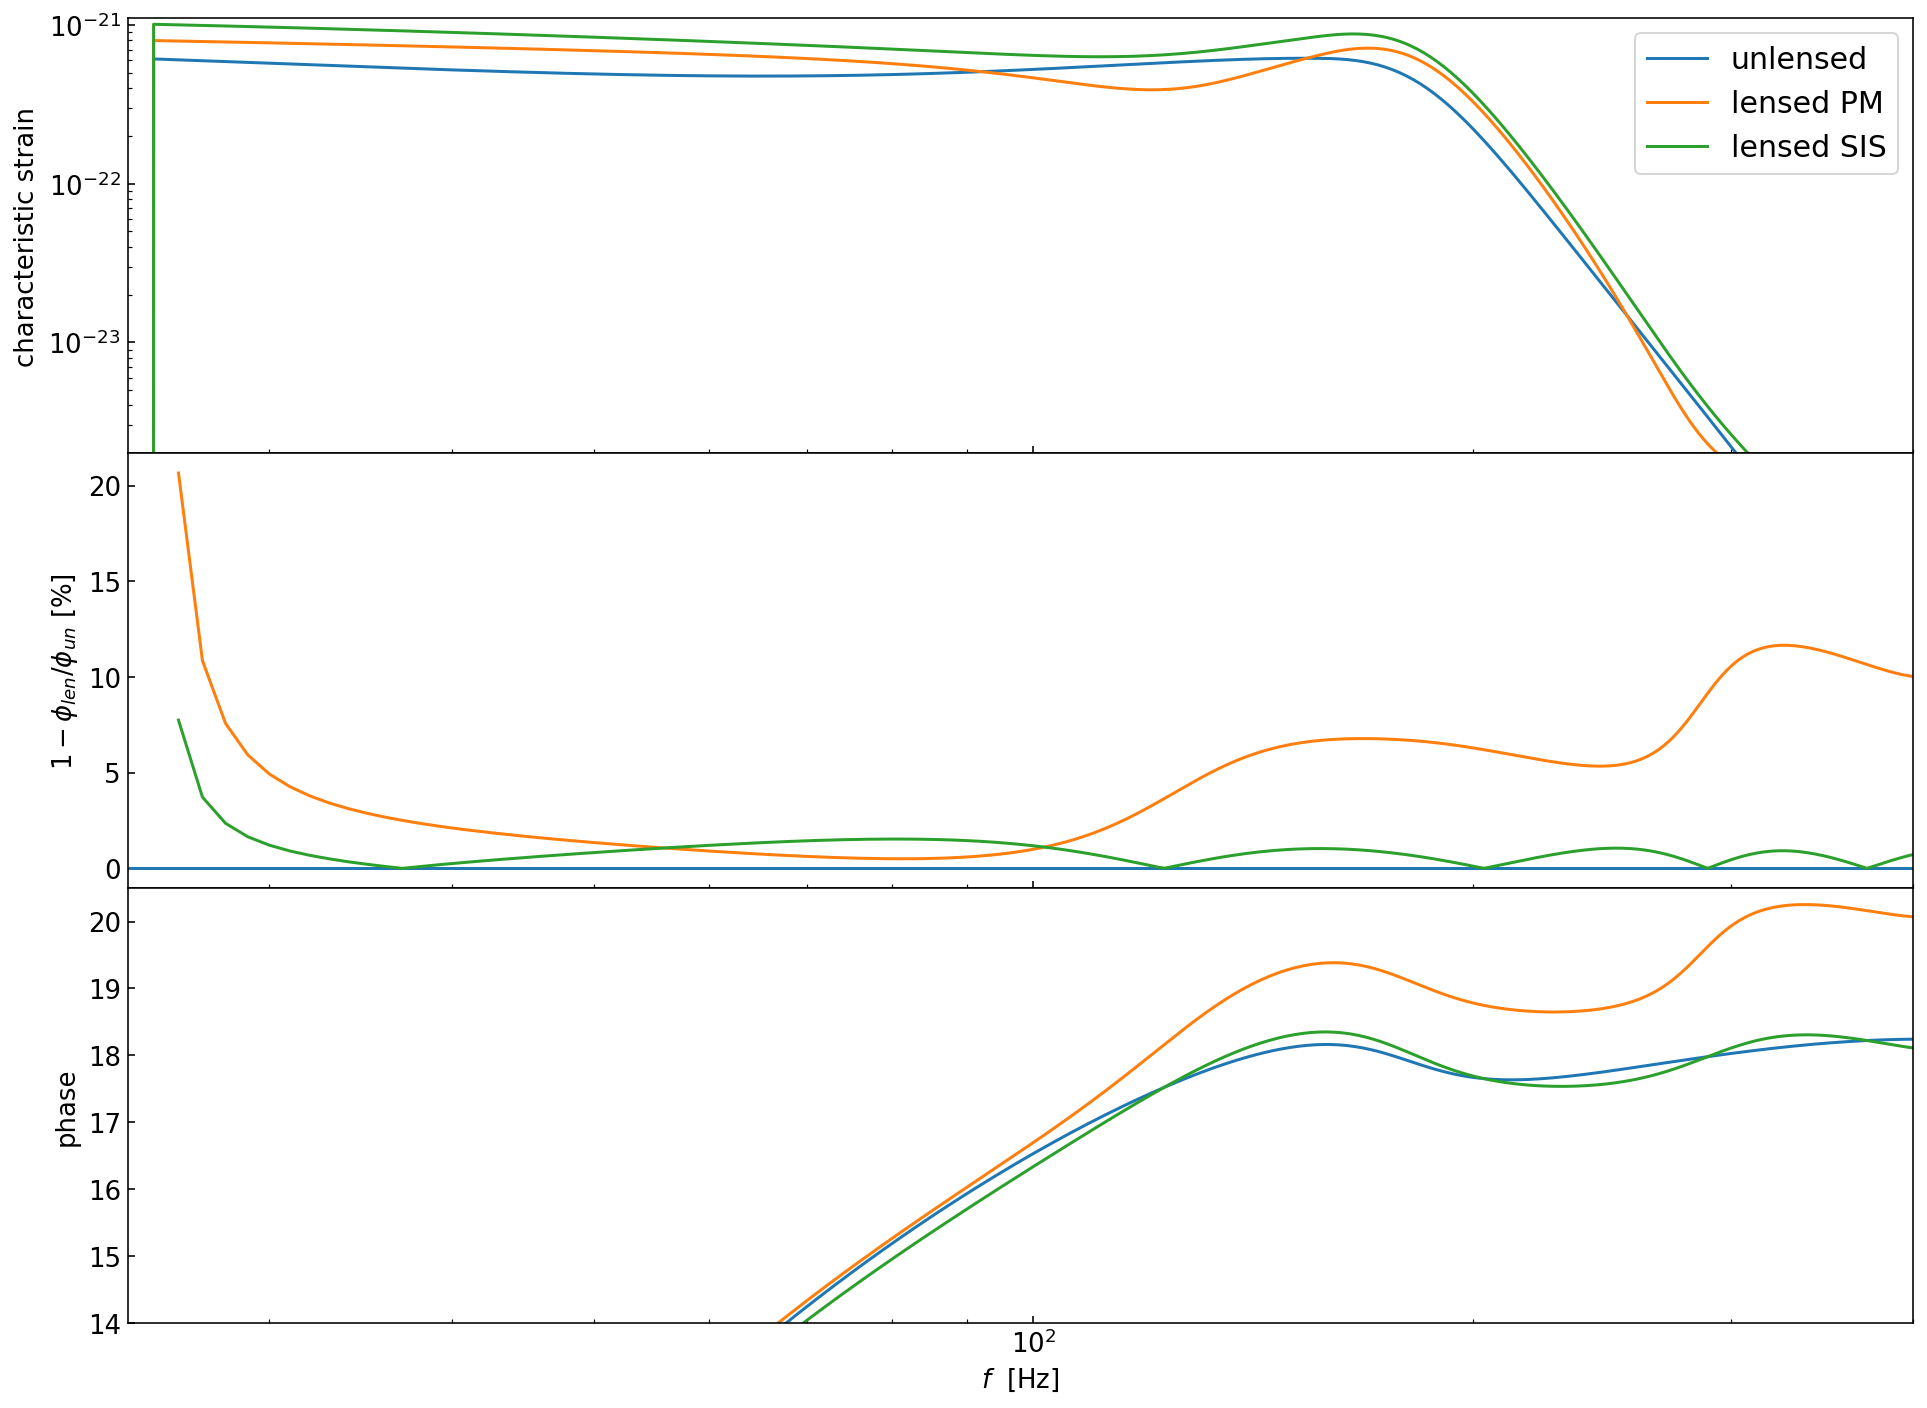

In [11]:
fig,axs = plt.subplots(3,1,figsize=(16,12), sharex=True)
axs[0].plot(hp_f.sample_frequencies, 2*hp_f.sample_frequencies*abs(hp_f), label='unlensed')
axs[0].plot(hp_f.sample_frequencies, 2*hp_f.sample_frequencies*abs(hpL_f), label='lensed PM')
axs[0].plot(hp_f.sample_frequencies, 2*hp_f.sample_frequencies*abs(hpL_f_SIS), label='lensed SIS')
axs[1].plot(ps.sample_frequencies, np.zeros(len(ps)))#, label='unlensed phase')
axs[1].plot(ps_L.sample_frequencies, abs(100*(1-ps_L/ps)))#, label='lensed phase')
axs[1].plot(ps_L.sample_frequencies, abs(100*(1-ps_L_SIS/ps)))#, label='lensed phase')
axs[2].plot(ps.sample_frequencies, ps)#, label='unlensed phase')
axs[2].plot(ps_L.sample_frequencies, ps_L)#, label='lensed phase')
axs[2].plot(ps_L.sample_frequencies, ps_L_SIS)#, label='lensed phase')

for nn in [0,1,2]:
    axs[nn].set_xlim(24, 4e2)
    axs[nn].set_xscale('log')
    axs[nn].tick_params(axis='both',which='both',direction='in',labelsize=fontsz)
    
axs[0].set_ylabel('characteristic strain', fontsize=fontsz)
axs[1].set_ylabel('$1-\phi_{len}/\phi_{un}$ [%]', fontsize=fontsz)
axs[2].set_ylabel('phase', fontsize=fontsz)
axs[0].set_yscale('log')
axs[0].set_ylim(2e-24, 1.1e-21)
axs[2].set_ylim(14, 20.5)
plt.xlabel('$f~$ [Hz]', fontsize=fontsz)

axs[0].legend(fontsize=fontSz)
#fig.legend(ncol=2,loc='lower center',bbox_to_anchor=(0.5,.88),fontsize=fontsz,framealpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig(dir_out+my_great_multiple_panel_plot'.pdf', bbox_inches='tight', transparent=True)
plt.show()